MUHAMMED GÜLSOY <br>
2200000005

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/dataset/kindle_data-v2-1.csv")

In [4]:
df.head(1)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships


In [9]:
df["reviews"].sort_values(ascending=False)

28874     618227
28628     296710
28641     289251
30579     272608
28634     242575
           ...  
21562          0
21563          0
21564          0
21565          0
133101         0
Name: reviews, Length: 133102, dtype: int64

# QUESTION 1-A<br>
> Filter the dataset by taking the rows in which number of ‘reviews’ are greater than 1 and less then 201. Then save it.<br>
In this new dataset, create a column named ‘Popularity’. Popularity will contain the information about number of reviews and if the book is bestseller, editorspick or a Goodreads choice. To calculate popularity points, use the formula below: <br>

Popularity = reviews + reviews*isBestSeller + reviews*isEditorsPick + reviews*isGoodReadsChoice<br>

Hint: To do it, you should convert the True/False statements into numerical ones. Remember, this true false values mean something, they are not nominal type of categories like blue, green, purple etc. So you should check out other converting functions.


In [5]:
s1_df=df[(df["reviews"]>1) & (df["reviews"]<201)]

In [6]:
print(len(df))
print(len(s1_df))

133102
26597


In [49]:
s1_df['Popularity'] = (s1_df['reviews'] + s1_df['reviews'] * s1_df['isBestSeller'] + s1_df['reviews'] * s1_df['isEditorsPick'] + s1_df['reviews'] * s1_df['isGoodReadsChoice'])


<ipython-input-49-6c36abd4a435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1_df['Popularity'] = (s1_df['reviews'] + s1_df['reviews'] * s1_df['isBestSeller'] + s1_df['reviews'] * s1_df['isEditorsPick'] + s1_df['reviews'] * s1_df['isGoodReadsChoice'])


In [64]:
len(s1_df['Popularity'])

26597

# QUESTION 1-B
>Show the count, mean, std, min, 25%, 50%, 75%, max of the Popularity column.

In [51]:
s1_df["Popularity"].describe()

count    26597.000000
mean        74.197992
std         61.514473
min          2.000000
25%         23.000000
50%         59.000000
75%        115.000000
max        400.000000
Name: Popularity, dtype: float64

# QUESTION 1-C
>Since you find out the mean in ‘Popularity’, create a loop to count the books which has a greater popularity rate than mean

In [65]:
a=0
mean=s1_df["Popularity"].mean()
for i in s1_df["Popularity"]:
  if i>mean:
    a=a+1
print(f"Amount of books whose popularity is greater than mean is {a}")

Amount of books whose popularity is greater than mean is 11078


# alternative solution for 1-c

In [66]:
mean=s1_df["Popularity"].mean()
a=0
for index, row in s1_df.iterrows():
    if row['Popularity'] > mean:
         a+= 1
print(a)

11078


# QUESTION 2
>Create a correlation matrix to find the relationship between stars, reviews, price, Popularity, isBestSeller, isEditorsPick, isGoodReadsChoice columns.

In [78]:
a=["stars","reviews","price","Popularity","isBestSeller","isEditorsPick","isGoodReadsChoice"]
cor=s1_df.loc[:,a].corr()

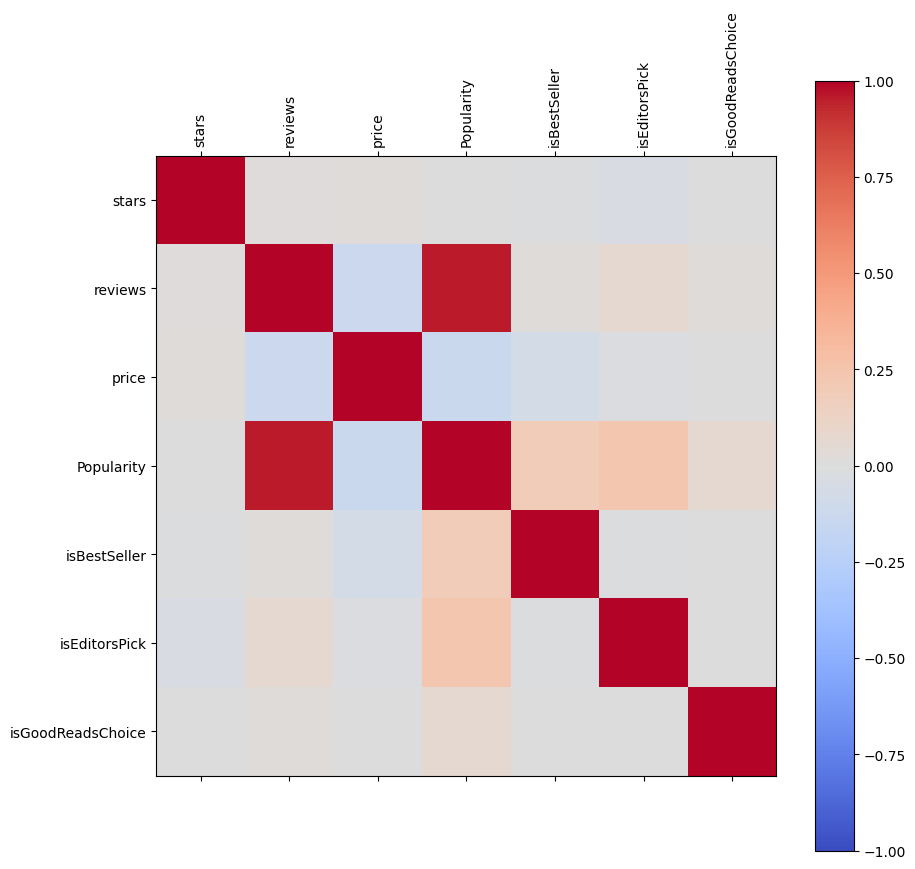

In [79]:

fig=plt.figure(figsize=(10,10)) #size of graph
ax=fig.add_subplot(111)
cax=ax.matshow(cor,cmap="coolwarm",vmin=-1,vmax=1) #cor and color mapping
fig.colorbar(cax) #bar that in position right hand side

#forming position of columns
ticks=np.arange(0,len(a),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)

#putting columns in the graph
ax.set_xticklabels(a)
ax.set_yticklabels(a)
plt.show()

Result of correlation map<br>
1.Reviews and popularity have a positive relationship each other. When popularity increases, reviews increases naturally.<br>
2.Popularity has a relationship with bestseller and editorsPick. But it is not much strong.<br>
3.isGoodReadsChoice and stars almost 0 correlation exclude themselves. It means that they have a weak relationship with others.